# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [38]:
# student 1: Roee Avisar 4308
# student 2: Daniel Bar Natan 6318

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline




In [3]:
# Load the datasets
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

# Display the first few rows of the train and test datasets
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

# Check for missing values in the training dataset
print("\nMissing Values:")
print(train_data.isnull().sum())

# Check for infinite values in the 'MedHouseVal' column
print("\nInfinite Values:")
has_inf = np.isinf(train_data['MedHouseVal']).any()
print(has_inf)

# Display statistical summary of the training dataset
print("\nDescriptive Statistics:")
print(train_data.describe())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(train_data.duplicated().sum())

Train Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  

Test Data:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836  

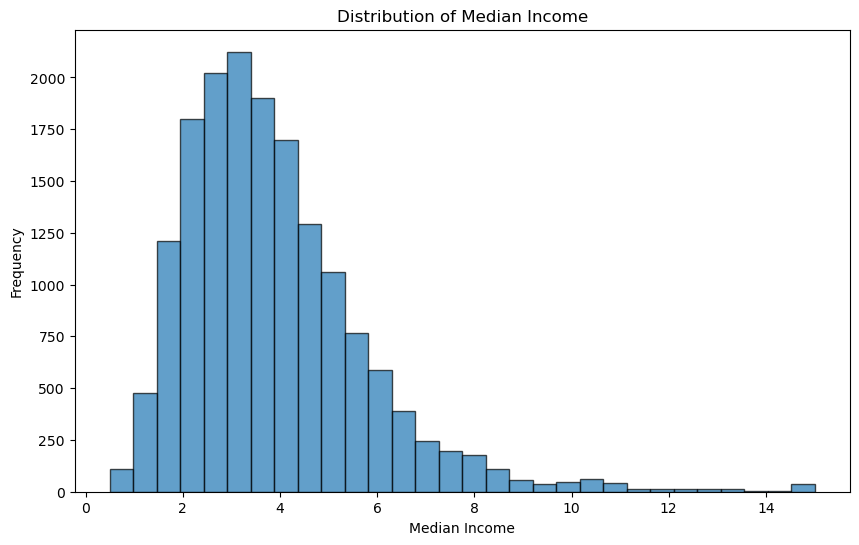

In [4]:
import matplotlib.pyplot as plt

# Histogram to understand income distribution using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train_data['MedInc'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

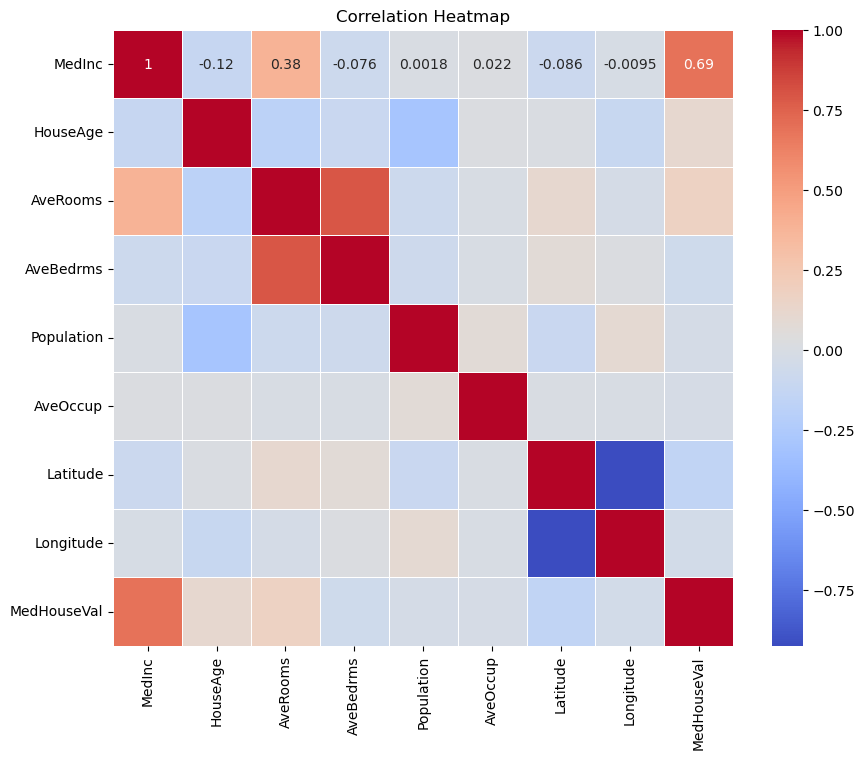

In [9]:
# Shows correlations between the features.
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

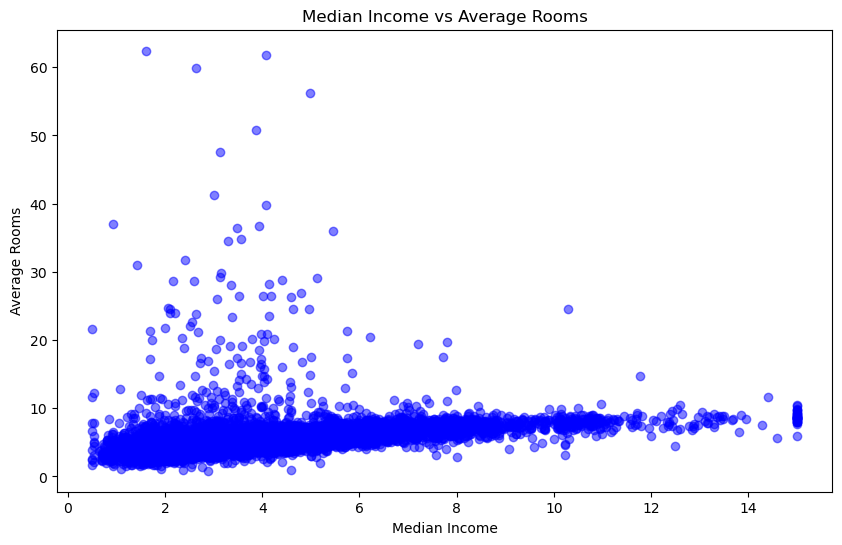

In [53]:
# Displays the relationship between income and the average number of rooms.
plt.figure(figsize=(10, 6))
plt.scatter(train_data['MedInc'], train_data['AveRooms'], alpha=0.5, color='b')
plt.title('Median Income vs Average Rooms')
plt.xlabel('Median Income')
plt.ylabel('Average Rooms')
plt.show()

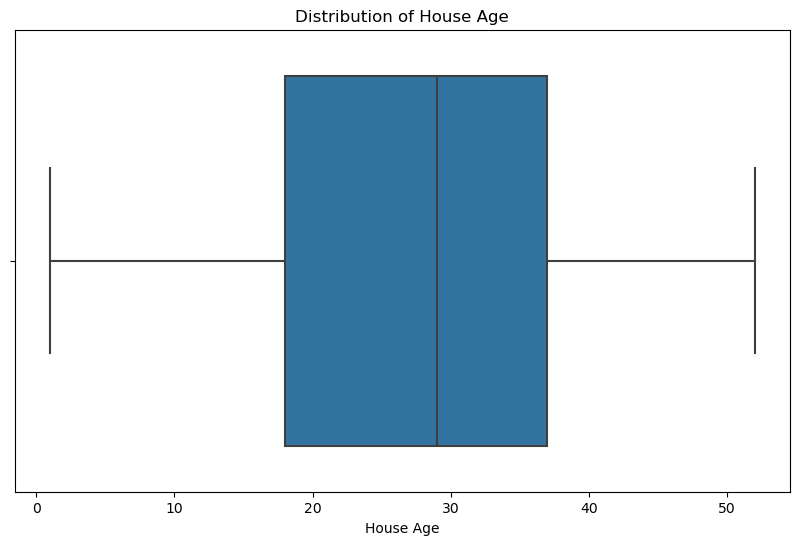

In [56]:
# Box plot to examine house age distribution and outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['HouseAge'])
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [5]:
# Split the data into features (X) and target (y)

X_train = train_data.drop('MedHouseVal', axis=1)  # Assuming 'MedInc' is the target variable
y_train = train_data['MedHouseVal']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# 5-Fold Cross-Validation for Linear Regression
lin_reg_cv_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Linear Regression Cross-Validation R^2 Scores:", lin_reg_cv_scores)
print("Mean R^2 Score:", np.mean(lin_reg_cv_scores))

# 5-Fold Cross-Validation for Random Forest Regressor
rf_cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nRandom Forest Cross-Validation R^2 Scores:", rf_cv_scores)
print("Mean R^2 Score:", np.mean(rf_cv_scores))

knn_cv_scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nKNN Regressor Cross-Validation R^2 Scores:", knn_cv_scores)
print("Mean R^2 Score:", np.mean(knn_cv_scores))


Linear Regression Cross-Validation R^2 Scores: [0.62417731 0.60552121 0.58543644 0.60879424 0.60018982]
Mean R^2 Score: 0.6048238023221038

Random Forest Cross-Validation R^2 Scores: [0.8149033  0.79803525 0.78380395 0.79796732 0.7917227 ]
Mean R^2 Score: 0.7972865014360961

KNN Regressor Cross-Validation R^2 Scores: [0.69895575 0.67889473 0.6465381  0.65844185 0.66290243]
Mean R^2 Score: 0.6691465706600238


In [6]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [None, 10],    
    'min_samples_split': [2, 5] 
}

# Perform Grid Search with 5-Fold Cross-Validation
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters and the best R^2 score
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation R^2 Score:", grid_search_rf.best_score_)



Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation R^2 Score: 0.7976079398425843


In [8]:
# Example of a new feature: Interaction between AveRooms and HouseAge
train_data['Rooms_Age_Interaction'] = train_data['AveRooms'] * train_data['HouseAge']

# Standardize again after creating new features
X_train_new = train_data.drop('MedHouseVal', axis=1)
X_train_new_scaled = scaler.fit_transform(X_train_new)

# Cross-Validation with the new feature
rf_cv_scores_new = cross_val_score(random_forest, X_train_new_scaled, y_train, cv=5, scoring='r2')
print("\nRandom Forest with New Feature Cross-Validation R^2 Scores:", rf_cv_scores_new)
print("Mean R^2 Score:", np.mean(rf_cv_scores_new))




Random Forest with New Feature Cross-Validation R^2 Scores: [0.81325614 0.79577613 0.78207876 0.79702322 0.79182854]
Mean R^2 Score: 0.7959925574508687


In [10]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest (Tuned)', 'Random Forest (New Feature)'],
    'R^2 Mean': [np.mean(lin_reg_cv_scores), np.mean(rf_cv_scores), grid_search_rf.best_score_, np.mean(rf_cv_scores_new)]
})
print(results_df)


                         Model  R^2 Mean
0            Linear Regression  0.604824
1                Random Forest  0.797287
2        Random Forest (Tuned)  0.797608
3  Random Forest (New Feature)  0.795993


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [11]:
# Use the best combination of features and hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    random_state=42
)

# Re-train the model on the full training dataset with the best settings
best_rf_model.fit(X_train_new_scaled, y_train)


RandomForestRegressor(min_samples_split=5, random_state=42)

In [12]:
# Re-train the model on the data including the new feature
best_rf_model.fit(X_train_new_scaled, y_train)


RandomForestRegressor(min_samples_split=5, random_state=42)

In [13]:
# Process the test set similarly (add the new feature and scale)
test_data['Rooms_Age_Interaction'] = test_data['AveRooms'] * test_data['HouseAge']
X_test_new = test_data.drop('MedHouseVal', axis=1)  # Assuming 'MedInc' is also in test_data
X_test_new_scaled = scaler.transform(X_test_new)

# Make predictions on the test set
test_predictions = best_rf_model.predict(X_test_new_scaled)

# Display the first few predictions
print("Test Predictions: ", test_predictions[:5])


Test Predictions:  [3.36920035 2.33058683 2.6984605  1.16888999 1.26635299]


In [14]:
from sklearn.metrics import r2_score

# Assuming the test set contains true 'MedInc' values for evaluation
y_test = test_data['MedHouseVal']
test_r2 = r2_score(y_test, test_predictions)

print(f"Test Set R^2 Score: {test_r2}")


Test Set R^2 Score: 0.8206664159627254


## Part 5 - Apply on test and show model performance estimation

In [15]:
# Create a DataFrame to show actual vs predicted values for the first 5 entries
comparison_df = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': test_predictions[:5]
})

print(comparison_df)


   Actual  Predicted
0   3.852   3.369200
1   2.457   2.330587
2   2.013   2.698461
3   1.052   1.168890
4   1.078   1.266353


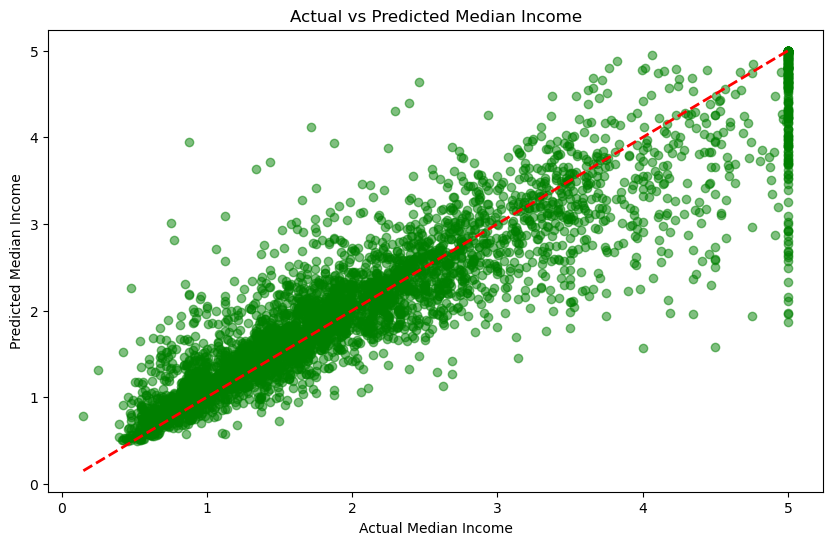

In [16]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Median Income')
plt.xlabel('Actual Median Income')
plt.ylabel('Predicted Median Income')
plt.show()


In [17]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest (Tuned)', 'Random Forest (New Feature)'],
    'R^2 Mean (Train)': [np.mean(lin_reg_cv_scores), np.mean(rf_cv_scores), grid_search_rf.best_score_, np.mean(rf_cv_scores_new)],
    'R^2 (Test)': [None, None, None, test_r2]  # Adding None for models not evaluated on test set
})
print(results_df)


                         Model  R^2 Mean (Train)  R^2 (Test)
0            Linear Regression          0.604824         NaN
1                Random Forest          0.797287         NaN
2        Random Forest (Tuned)          0.797608         NaN
3  Random Forest (New Feature)          0.795993    0.820666
